In [2]:
import numpy as np
import pandas as pd

## Census

### Basic Data

In [17]:
# Basic data

# Columns to import
basic_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Base dos Dados/setor_censitario_basico_2010.csv",
    usecols=["id_setor_censitario", "sigla_uf", "v001", "v002", "v005"],
)

# Renaming columns
rename_dict = {
    "id_setor_censitario": "sector_id",
    "sigla_uf": "state",
    "v001": "n_households",
    "v002": "n_people",
    "v005": "avg_monthly_earnings",
}
basic_df = basic_df.rename(columns=rename_dict)
basic_df.head()

,sector_id,state,n_households,n_people,avg_monthly_earnings
0,170025105000002,TO,115.0,300.0,648.06
1,170025105000003,TO,59.0,167.0,433.73
2,170030105000001,TO,286.0,1123.0,927.45
3,170030105000002,TO,294.0,1101.0,478.33
4,170030105000003,TO,102.0,385.0,453.32


### Data on people aged 15-17

In [13]:
# School aged children (15-17)


# Count of people of different races at school age
school_aged_races_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Base dos Dados/setor_censitario_raca_idade_genero_2010.csv",
    usecols=["id_setor_censitario", "v027", "v028", "v029", "v030", "v031"],
)

# Count of men at school age
school_aged_men_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Base dos Dados/setor_censitario_idade_homens_2010.csv",
    usecols=["id_setor_censitario", "v049", "v050", "v051"],
)

# Count of women at school age
school_aged_women_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Base dos Dados/setor_censitario_idade_mulheres_2010.csv",
    usecols=["id_setor_censitario", "v049", "v050", "v051"],
)

# Total count of people at school age
school_aged_total_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Base dos Dados/setor_censitario_idade_total_2010.csv",
    usecols=["id_setor_censitario", "v049", "v050", "v051"],
)


# Renaming columns

school_aged_races_df = school_aged_races_df.rename(
    columns={
        "id_setor_censitario": "sector_id",
        "v027": "n_people_15to17_white",
        "v028": "n_people_15to17_black",
        "v029": "n_people_15to17_asian",
        "v030": "n_people_15to17_parda",
        "v031": "n_people_15to17_indigenous",
    }
)

# Male
school_aged_men_df = school_aged_men_df.rename(
    columns={
        "id_setor_censitario": "sector_id",
        "v049": "n_people_15_men",
        "v050": "n_people_16_men",
        "v051": "n_people_17_men"
    }
)

# Female
school_aged_women_df = school_aged_women_df.rename(
    columns={
        "id_setor_censitario": "sector_id",
        "v049": "n_people_15_women",
        "v050": "n_people_16_women",
        "v051": "n_people_17_women"
    }
)

school_aged_total_df = school_aged_total_df.rename(
    columns={
        "id_setor_censitario": "sector_id",
        "v049": "n_people_15",
        "v050": "n_people_16",
        "v051": "n_people_17"
    }
)


# Joining
school_aged_df = pd.merge(school_aged_races_df, school_aged_total_df, on="sector_id", how = "outer")
school_aged_df = pd.merge(school_aged_df, school_aged_men_df, on="sector_id", how = "left")
school_aged_df = pd.merge(school_aged_df, school_aged_women_df, on="sector_id", how = "left")


# Adding up to get total people aged 15 to 17
school_aged_df["n_people_15to17"] = school_aged_df["n_people_15"] + school_aged_df["n_people_16"] + school_aged_df["n_people_17"]
school_aged_df["n_people_15to17_alternative"] = school_aged_df.loc[:, "n_people_15to17_white":"n_people_15to17_indigenous"].sum(1)
school_aged_df.head()

,sector_id,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,n_people_15,n_people_16,n_people_17,n_people_15_men,n_people_16_men,n_people_17_men,n_people_15_women,n_people_16_women,n_people_17_women,n_people_15to17,n_people_15to17_alternative
0,140002705000001,13.0,1.0,1.0,54.0,9.0,28.0,27.0,23.0,16.0,14.0,11.0,12.0,13.0,12.0,78.0,78.0
1,140002705000002,0.0,0.0,0.0,4.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,4.0
2,140002705000003,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,140002705000004,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0
4,140002705000005,0.0,0.0,0.0,0.0,13.0,7.0,5.0,1.0,3.0,3.0,1.0,4.0,2.0,0.0,13.0,13.0


In [11]:
# Percentage of times that the sum agree with each other
np.mean(school_aged_df["n_people_15to17"] == school_aged_df["n_people_15to17_alternative"])

0.979369276409132

In [27]:
school_aged_df.isnull().sum()

sector_id                         0
n_people_15to17_white          6302
n_people_15to17_black          6302
n_people_15to17_asian          6302
n_people_15to17_parda          6302
n_people_15to17_indigenous     6302
n_people_15                    6302
n_people_16                    6302
n_people_17                    6302
n_people_15_men                6302
n_people_16_men                6302
n_people_17_men                6302
n_people_15_women              6302
n_people_16_women              6302
n_people_17_women              6302
n_people_15to17                6302
n_people_15to17_alternative       0
dtype: int64

### Geolocation data

In [22]:
# Geo data
import warnings
warnings.filterwarnings('ignore')
import geobr 
geo_df = geobr.read_census_tract(code_tract="all", year = 2010)
geo_df['code_tract'] = geo_df['code_tract'].astype("int64")
geo_df.head()


,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,geometry
0,110009812000003,RURAL,1100098.0,Espigão D'oeste,None,NaN,1.100098e+10,None,110009812.0,Novo Paraíso,11.0,"MULTIPOLYGON (((-60.89575 -11.35508, -60.89557..."
1,110009815000001,URBANO,1100098.0,Espigão D'oeste,None,NaN,1.100098e+10,None,110009815.0,Flor Da Serra,11.0,"MULTIPOLYGON (((-60.74999 -11.39990, -60.74575..."
2,110009815000002,RURAL,1100098.0,Espigão D'oeste,None,NaN,1.100098e+10,None,110009815.0,Flor Da Serra,11.0,"MULTIPOLYGON (((-60.72986 -11.35738, -60.72954..."
3,110009815000003,RURAL,1100098.0,Espigão D'oeste,None,NaN,1.100098e+10,None,110009815.0,Flor Da Serra,11.0,"MULTIPOLYGON (((-60.91829 -11.29374, -60.91600..."
4,110009815000004,RURAL,1100098.0,Espigão D'oeste,None,NaN,1.100098e+10,None,110009815.0,Flor Da Serra,11.0,"MULTIPOLYGON (((-60.69047 -11.38391, -60.68743..."


In [51]:
geo_df = pd.read_csv(
    "/Users/feliphlvo/Documents/Minerva/Capstone/data/Base dos Dados/geobr_setor_censitario_2010.csv"
)
rename_dict = {
    "id_setor_censitario": "sector_id",
    "sigla_uf": "state",
    "zona": "zone",
    "id_uf": "id_state",
    "id_municipio": "id_municipality",
    "nome_municipio": "name_municipality",
    "id_vizinhanca": "id_neighborhood",
    "nome_vizinhanca": "name_neighborhood",
    "id_subdistrito": "id_subdistrict",
    "nome_subdistrito": "name_subdistrict",
    "id_distrito": "id_district",
    "nome_distrito": "name_district",
    "geometria":"geometry"
}
geo_df = geo_df.rename(columns=rename_dict)
#geo_df = geo_df.drop("state", axis = 1)
geo_df.head()

,id_state,state,id_municipality,name_municipality,id_district,name_district,id_subdistrict,name_subdistrict,name_neighborhood,id_neighborhood,sector_id,zone,geometry
0,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000413,URBANO,"POLYGON((-51.08969592 0.0141339599999884, -51...."
1,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000414,URBANO,"POLYGON((-51.08629608 0.00693296999998684, -51..."
2,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000415,URBANO,"POLYGON((-51.0883415989108 0.0081305483532985,..."
3,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000416,URBANO,"POLYGON((-51.08961708 0.00619100999998428, -51..."
4,16,AP,1600303,Macapá,160030305,Macapá,16003030500,NaN,Congos,1.600303e+11,160030305000417,URBANO,POLYGON((-51.0946480437271 0.00696638253808538...


In [52]:
geo_df.isnull().sum()

id_state                  0
state                     0
id_municipality           0
name_municipality         0
id_district               0
name_district             0
id_subdistrict            0
name_subdistrict     263233
name_neighborhood    210013
id_neighborhood      210013
sector_id                 0
zone                      0
geometry                  2
dtype: int64

### Merging Everything

In [70]:
dem_census_df = pd.merge(basic_df, school_aged_df, on="sector_id", how = "outer")
dem_census_df = pd.merge(dem_census_df, geo_df, on="sector_id", how = "outer")


In [54]:
dem_census_df.head()

,sector_id,state_x,n_households,n_people,avg_monthly_earnings,n_people_15to17_white,n_people_15to17_black,n_people_15to17_asian,n_people_15to17_parda,n_people_15to17_indigenous,...,id_municipality,name_municipality,id_district,name_district,id_subdistrict,name_subdistrict,name_neighborhood,id_neighborhood,zone,geometry
0,170025105000002,TO,115.0,300.0,648.06,1.0,0.0,0.0,10.0,0.0,...,1700251.0,Abreulândia,170025105.0,Abreulândia,1.700251e+10,NaN,NaN,NaN,RURAL,"POLYGON((-49.1474683391864 -9.57423749342587, ..."
1,170025105000003,TO,59.0,167.0,433.73,0.0,0.0,0.0,0.0,0.0,...,1700251.0,Abreulândia,170025105.0,Abreulândia,1.700251e+10,NaN,NaN,NaN,RURAL,"POLYGON((-49.2918054788623 -9.32877409877353, ..."
2,170030105000001,TO,286.0,1123.0,927.45,10.0,2.0,3.0,59.0,0.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,URBANO,"POLYGON((-47.4800002365659 -6.56077877086219, ..."
3,170030105000002,TO,294.0,1101.0,478.33,11.0,0.0,1.0,46.0,0.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,URBANO,"POLYGON((-47.4668802455097 -6.56653402083836, ..."
4,170030105000003,TO,102.0,385.0,453.32,3.0,1.0,0.0,17.0,0.0,...,1700301.0,Aguiarnópolis,170030105.0,Aguiarnópolis,1.700301e+10,NaN,NaN,NaN,RURAL,"POLYGON((-47.4673664540108 -6.53920941627379, ..."


In [55]:
dem_census_df.isnull().sum()

sector_id                           0
state_x                          6454
n_households                     7227
n_people                         7227
avg_monthly_earnings             7227
n_people_15to17_white           12756
n_people_15to17_black           12756
n_people_15to17_asian           12756
n_people_15to17_parda           12756
n_people_15to17_indigenous      12756
n_people_15                     12756
n_people_16                     12756
n_people_17                     12756
n_people_15_men                 12756
n_people_16_men                 12756
n_people_17_men                 12756
n_people_15_women               12756
n_people_16_women               12756
n_people_17_women               12756
n_people_15to17                 12756
n_people_15to17_alternative      6454
id_state                           29
state_y                            29
id_municipality                    29
name_municipality                  29
id_district                        29
name_distric

In [71]:
dem_census_df.geometry

0         POLYGON((-49.1474683391864 -9.57423749342587, ...
1         POLYGON((-49.2918054788623 -9.32877409877353, ...
2         POLYGON((-47.4800002365659 -6.56077877086219, ...
3         POLYGON((-47.4668802455097 -6.56653402083836, ...
4         POLYGON((-47.4673664540108 -6.53920941627379, ...
                                ...                        
316569    POLYGON((-47.9205917917823 -19.7474515756278, ...
316570    POLYGON((-47.960527947528 -19.7433768401621, -...
316571    POLYGON((-47.9512317217339 -19.775265496902, -...
316572    POLYGON((-48.3525665520462 -18.949237950633, -...
316573    POLYGON((-42.3005973247862 -19.6041134550069, ...
Name: geometry, Length: 316574, dtype: object

In [74]:
import geopandas as gpd
from shapely import wkt
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
dem_census_df["geometry"] = dem_census_df['geometry'].apply(wkt_loads)


In [77]:
geo_dataframe = gpd.GeoDataFrame(dem_census_df, crs = "EPSG:4674", geometry = 'geometry')

<AxesSubplot:>

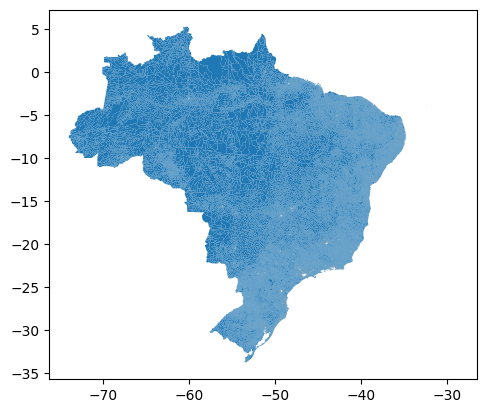

In [78]:
geo_dataframe.plot()